# Initialization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.colors as ListedColormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# importing NumPy and NetworkX for working with graphs
import numpy as np
import networkx as nx

# importing topogenesis for working with lattices / regular-grids
import topogenesis as tg

# importing Pandas and display for clearer representation of table data and matrices
import pandas as pd
from IPython.display import display

# itertools to unpack list of lists and produce generator
import itertools
from itertools import chain

#For a max of fun
import time
import math

# for excel communication
import re
import openpyxl as xl

#for repository access (TIM)
import ast
import collections
import operator

# Definitions

## List creation

In [2]:
# Credits to Terra Tetris project for this definition of a matrix generator
# doesn't quite work... can be improved

def matrix_generator_for_functions(a):
    perfect_square = [0]
    y_grid = []
    for i in range(1, a+1):
        b = i*i
        if b <= a:
            perfect_square.append(b)
    c = math.sqrt(perfect_square[-1])
    d = a-perfect_square[-1]
    if d < c:
        y_grid.append(c)
    elif c < d < c*2:
        y_grid.append(c+1)
    else:
        y_grid.append(c+2)
    matrix = (int(c), int(y_grid[0]))

    return matrix

## configuring

In [108]:
def save_imshow(array, name):
    plt.imshow(array, interpolation="nearest", cmap="Pastel1")
    # name the png
    folder = r'C:\Users\Thomas Lindemann\OneDrive - Delft University of Technology\Earthy\02_Configuration\Process_study\export matrix images\w'
    name = str(name)
    url = folder + name + ".png"
    # Save
    plt.savefig(url, dpi=300)

In [3]:
# sort ID by variety of turns, assumed to be the preferred generations
def variety(elem):
    return len(set(str(elem)))

In [4]:
def edges_of_shape(array, valuetosearch):
    corners = corners_of_shape(array, valuetosearch)
    #RIGTH SIDE (fix y)
    start = corners[0][0] - 1
    end = corners[1][0] + 1
    size = start - end
    index_side = []
    index_temp = []
    for i in range(0, size+1):
        a = start - i
        tuple_temp = (a, corners[0][1])
        index_temp.append(tuple_temp)
    index_side.append(index_temp)
    # print("right side:", index_temp)

    #TOP SIDE (fix x)
    start = corners[1][1] - 1
    end = corners[2][1] + 1
    size = start - end
    index_temp = []
    for i in range(0, size+1):
        a = start - i
        tuple_temp = (corners[1][0], a)
        index_temp.append(tuple_temp)
    index_side.append(index_temp)
    # print("top side:", index_temp)

    #LEFT SIDE (fix y)
    start = corners[2][0] + 1
    end = corners[3][0] - 1
    size = end - start
    index_temp = []
    for i in range(0, size+1):
        a = start + i
        tuple_temp = (a, corners[2][1])
        index_temp.append(tuple_temp)
    index_side.append(index_temp)
    # print("left side:", index_temp)

    #BOTTOM SIDE (fix x)
    start = corners[3][1] + 1
    end = corners[0][1] - 1
    size = end - start
    index_temp = []
    for i in range(0, size+1):
        a = start + i
        tuple_temp = (corners[3][0], a)
        index_temp.append(tuple_temp)
    index_side.append(index_temp)
    # print("bottom side:", index_temp)

    return index_side

In [5]:
# Retrieve the indexes of the corners of the shape 
# equal to the value inputed
def corners_of_shape(array, valuetosearch):
    indexes = index_of(array, valuetosearch)
    # print(indexes)
    tempx = []
    tempy = []
    for i in range(0, int(len(indexes))):
        tempx.append(indexes[i][0])
        tempy.append(indexes[i][1])

    tempx.sort()
    tempy.sort()

    corners = []
    c1 = (tempx[-1], tempy[-1])
    corners.append(c1)
    c2 = (tempx[0], tempy[-1])
    corners.append(c2)
    c3 = (tempx[0], tempy[0])
    corners.append(c3)
    c4 = (tempx[-1], tempy[0])
    corners.append(c4)
    return corners

In [6]:
# Give General applying method based on a local direction

# Assign a wanted direction to a type of placing the shape depending on the initial starting
# position of the configuration. 

def Direction_to_operator(starting_pos, Direction):
    if starting_pos == 0 or starting_pos == 1:
        Operator = Direction
    if starting_pos == 2 or starting_pos == 3:
        Operator = (Direction + 1) % 4
    if starting_pos == 4 or starting_pos == 5:
        Operator = (Direction + 2) % 4
    if starting_pos == 6 or starting_pos == 7:
        Operator = (Direction - 1) % 4
    return Operator


In [7]:
# Retrieve the shape of the function in the repository
def Shape(value_in_repository):
    a = Repository[value_in_repository][1]
    if type(a) == tuple:
        return a
    else:
        items = a[1:-1]
        items = items.split(", ")
        a = []
        a.append(int(items[0]))
        a.append(int(items[1]))
        a = tuple(a)
        return a

In [8]:
# Reverse tuple
def Reverse(tuples):
    new_tup = tuples[::-1]
    return new_tup

## Courtyard related

In [9]:
######### populated courtyard definitions

#Order
def sort_with_key(data, key):
    sorting = [0, 0, 0, 0]
    for p in range(0, len(key)):
        a = key[p]
        sorting[a] = data[p]
    return sorting
# create queues and slots
def create_queues(c_rooms, c_rooms_codes, slot_widths, courtyard_matrix, corner_connections):

    queue4 = []
    queue3 = []
    queue2 = []
    queue23 = []
    queue342 = []
    queue43 = []

    for i in range(0, len(c_rooms)):
        if (c_rooms[i][0] == 4) and (c_rooms[i][1] == 3):
            queue43.append(c_rooms[i][1])
            queue342.append(c_rooms[i][0])
        elif (c_rooms[i][0] == 3) and (c_rooms[i][1] == 2):
            queue342.append(c_rooms[i][1])
            queue23.append(c_rooms[i][0])
        elif (c_rooms[i][0] == 4):
             queue4.append(c_rooms[i][1])
        elif (c_rooms[i][1] == 4):
            queue4.append(c_rooms[i][0])
        elif (c_rooms[i][0] == 3):
            queue3.append(c_rooms[i][1])
        elif (c_rooms[i][1] == 3):
            queue3.append(c_rooms[i][0])
        elif (c_rooms[i][0] == 2):
            queue2.append(c_rooms[i][1])
        elif (c_rooms[i][1] == 2):
            queue2.append(c_rooms[i][0])

    # print("Queue 4: " + str(queue4))
    # print("Queue 3: " + str(queue3))
    # print("Queue 2: " + str(queue2))
    # print("Queue 23: " + str(queue23))
    # print("Queue 43: " + str(queue43))
    # print("Queue 342: " + str(queue342))

    # assigns the corners of the courts to the pieces with the larger thickness (most likely to leave space for doors)

    starting_points = [0, 0, 0, 0]

    # solve corner 0
    if slot_widths[0] > slot_widths[3] and corner_connections[0] == 0:
        slot0_lenght = courtyard_matrix[1] + slot_widths[3]
        slot3_lenght = courtyard_matrix[0]
        starting_points[0] = -(slot_widths[3])
    elif slot_widths[0] <= slot_widths[3] and corner_connections[0] == 0:
        slot0_lenght = courtyard_matrix[1] 
        slot3_lenght = courtyard_matrix[0] + slot_widths[0]
    else:
        slot0_lenght = courtyard_matrix[1] - 1
        slot3_lenght = courtyard_matrix[0] - 1
        starting_points[0] = 1
    # solve corner 2
    if slot_widths[1] > slot_widths[2] and corner_connections[2] == 0:
        slot1_lenght = courtyard_matrix[0] + slot_widths[2]
        slot2_lenght = courtyard_matrix[1]
    elif slot_widths[1] <= slot_widths[2] and corner_connections[2] == 0:
        slot1_lenght = courtyard_matrix[0] 
        slot2_lenght = courtyard_matrix[1] + slot_widths[1]
        starting_points[2] = -(slot_widths[1])
    else:
        slot1_lenght = courtyard_matrix[0] - 1
        slot2_lenght = courtyard_matrix[1] - 1
        starting_points[2] = 1
    # print("slot2 corner2:" + str(slot2_lenght))
    # solve corner 1
    if slot_widths[1] > slot_widths[0] and corner_connections[1] == 0:
        slot1_lenght = slot1_lenght + slot_widths[0]
        starting_points[1] = -(slot_widths[0])
    elif slot_widths[1] <= slot_widths[0] and corner_connections[1] == 0:
        slot0_lenght = slot0_lenght + slot_widths[1]
    else:
        slot1_lenght = slot1_lenght - 1
        slot0_lenght = slot0_lenght - 1
        starting_points[1] = 1
    # solve corner 3
    if slot_widths[3] > slot_widths[2] and corner_connections[3] == 0:
        slot3_lenght = slot3_lenght + slot_widths[2]
        starting_points[3] = -(slot_widths[2])
    elif slot_widths[3] <= slot_widths[2] and corner_connections[3] == 0:
        slot2_lenght = slot2_lenght + slot_widths[3]
    else:
        slot3_lenght = slot3_lenght - 1
        slot2_lenght = slot2_lenght - 1
        starting_points[3] = 1
    # print("slot0:" + str(slot0_lenght))
    # print("slot2:" + str(slot2_lenght))

    slot_lenghts = [slot0_lenght, slot1_lenght, slot2_lenght, slot3_lenght]
    
    # # sort them
    # a = sorted(range(len(slot_lenghts)),key=slot_lenghts.__getitem__, reverse=True)
    # slots_prio = sorted(slot_lenghts, reverse=True)
    # slots_widths_sort= [x for _,x in sorted(zip(a, slot_widths))]

    #doesn't sort
    a = sorted(range(len(slot_lenghts)),key=slot_lenghts.__getitem__, reverse=True)
    # slots_prio = slot_lenghts.copy()
    # slots_widths_sort = slot_widths.copy()


    # fill the court 

    court_dict = {
      "Queue4": queue4,
      "Queue3": queue3,
      "Queue2": queue2,
      "Queue342": queue342,
      "Queue43": queue43,
      "Queue23": queue23,
      "Rooms": c_rooms,
      "Rooms_Codes": c_rooms_codes,
      "slots": [[0], [0], [0], [0]], # will later be the final room order
      "slots_prio": slot_lenghts, # lenght of slots
      "slots_prio_keys": slot_widths, # width of slots
      "slots_order": a,  # order of the slots compared to the initial arragement
      "slots_starting": starting_points, # attention! already sorted in the final order
      "unassigned_lenghts": [[], [], [], []],
      "unassigned_spaces": [[], [], [], []],
      "Queue_Temp": [],
      "slots_roomcodes": [[], [], [], []]
    }

    return court_dict

def calculate_courtyard(courtyard_rooms, corner_connections):
    length_modules = (sum(corner_connections)) * 6

    for i in range(0, len(courtyard_rooms)):
        length_modules = length_modules + int(courtyard_rooms[i][0]) + int(courtyard_rooms[i][1])

    courtyard_edge = int(length_modules / 8)
    courtyard_matrix = (courtyard_edge, courtyard_edge)

    return courtyard_matrix

# define the population area of the courtyard 
def population_area(courtyard_rooms):

    p_area = 0

    for i in range(0, len(courtyard_rooms)):
        p_area = p_area + (courtyard_rooms[i][0] * courtyard_rooms[i][1])

    return p_area
    
# convert population area in surface around the courtyard (min. size : 2, max. size: 4)
def courtsize(l0, l1, l2, l3, courtyard_matrix, corners):
    court_area_full = courtyard_matrix[1] * l0 + courtyard_matrix[0] * l1 + courtyard_matrix[1] * l2 + courtyard_matrix[0] * l3 + l0* l1 + l1* l2 + l2* l3 + l3* l0
    c0  = l0* l3 + (l0 + l3)* 1
    c1 = l0* l1 + (l0 + l1)* 1
    c2 = l1* l2 + (l1 + l2)* 1
    c3 = l2* l3 + (l2 + l3)* 1
    if corners[0] == 1:
        court_area_full = court_area_full - c0
    if corners[1] == 1:
        court_area_full = court_area_full - c1
    if corners[2] == 1:
        court_area_full = court_area_full - c2
    if corners[3] == 1:
        court_area_full = court_area_full - c3

    return court_area_full

# get all possible combination of a list with a certain lenght
def combinations(array, tuple_length, prev_array=[]):
    if len(prev_array) == tuple_length:
        return [prev_array]
    combs = []
    for i, val in enumerate(array):
        prev_array_extended = prev_array.copy()
        prev_array_extended.append(val)
        combs += combinations(array[i+1:], tuple_length, prev_array_extended)
    return combs

In [10]:
# give the starting point of the green space depending on the general direction wished
def garden_st(st_courtyard, operator):
    if operator == 0:
        tempx = st_courtyard[0] + 1
        tempy = st_courtyard[1] + 1
    elif operator == 1:
        tempx = st_courtyard[0] - 1
        tempy = st_courtyard[1] + 1
    elif operator == 2:
        tempx = st_courtyard[0] - 1
        tempy = st_courtyard[1] - 1
    elif operator == 3:
        tempx = st_courtyard[0] + 1
        tempy = st_courtyard[1] - 1
    return (tempx, tempy)

In [11]:
#Retrieve the shape 2 cell smaller in x, y
#size of the green area inside a courtyard
def garden_space(courtyard_shape):
    a = courtyard_shape[0]
    b = a-2
    c = (courtyard_shape[1])
    d = c-2
    t = []
    t.append(b)
    t.append(d)

    return tuple(t)

## Place at corners

In [12]:
# Apply shape according to keyOperator (directions to place a shape)
# State array, st, sp and given value beforehand !!

# Detect directly
def Apply_corner_w_Ope(keyOperator):
    if keyOperator == 0:
        Down_rigth(array, st, sp, givenvalue)
    elif keyOperator == 1:
        Up_right(array, st, sp, givenvalue)
    elif keyOperator == 2:
        Up_left(array, st, sp, givenvalue)
    elif keyOperator == 3:
        Down_left(array, st, sp, givenvalue)

In [13]:
# place shape in array with corner as starting point
def Down_rigth(array, st, sp, givenvalue):
    array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]] = givenvalue

def Down_left(array, st, sp, givenvalue):
    array[st[0]:st[0] + sp[0], (st[1]+1) - sp[1]:(st[1]+1)] = givenvalue

def Up_right(array, st, sp, givenvalue):
    array[(st[0]+1) - sp[0]:(st[0]+1), st[1]:st[1] + sp[1]] = givenvalue

def Up_left(array, st, sp, givenvalue):
    array[(st[0]+1) - sp[0]:(st[0]+1), (st[1]+1) - sp[1]:(st[1]+1)] = givenvalue

In [14]:
def Detect_w_ope(keyOperator):
    if keyOperator == 0:
        result = Detect_D_R(array, st, sp)
    elif keyOperator == 1:
        result = Detect_U_R(array, st, sp)
    elif keyOperator == 2:
        result = Detect_U_L(array, st, sp)
    elif keyOperator == 3:
        result = Detect_D_L(array, st, sp)
    return result

In [15]:
#test if space to be place is free and in bound
#Operation with operator !
#minus starting point

def Detect_Bound_w_ope(array, St, Sp, keyOperator):
    sp = Sp
    st = St
    #Affect detection by operator
    if keyOperator == 0:
        detection = array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]]
    elif keyOperator == 1:
        detection = array[(st[0]+1) - sp[0]:(st[0]+1), st[1]:st[1] + sp[1]]
    elif keyOperator == 2:
        detection = array[(st[0]+1) - sp[0]:(st[0]+1), (st[1]+1) - sp[1]:(st[1]+1)]
    elif keyOperator == 3:
        detection = array[st[0]:st[0] + sp[0], (st[1]+1) - sp[1]:(st[1]+1)]

    #proceed with detection
    max_dist = np.sum(array.shape)
    array[st] = max_dist
    size_shape = sp[0]*sp[1]
    detection = list(detection.flatten())
    if int(len(detection)) == size_shape:
        # print("the shape is in bound")
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                # print("but cell is occupied")
                break
            else:
                result_detect = True
                # print("and this cell is free")

    else:  
        # print("st & space:",st, sp, "  -  detection:", detection)
        # print("len sp:", size_shape, "len detection:", len(detection), "the shape is out of bound")
        result_detect = False
    return result_detect

In [16]:
#Detect if shape to be place will overlap with another one or not
# minus starting point

def Detect_D_R(array, st, sp):
    max_dist = np.sum(array.shape)
    detection = array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]]
    array[st] = max_dist
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect
    
def Detect_D_L(array, st, sp):
    max_dist = np.sum(array.shape)
    detection = array[st[0]:st[0] + sp[0], (st[1]+1) - sp[1]:(st[1]+1)]
    array[st] = max_dist
    # result_detect = True
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

def Detect_U_R(array, st, sp):
    max_dist = np.sum(array.shape)
    detection = array[(st[0]+1) - sp[0]:(st[0]+1), st[1]:st[1] + sp[1]]
    array[st] = max_dist
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

def Detect_U_L(array, st, sp):
    max_dist = np.sum(array.shape)
    detection = array[(st[0]+1) - sp[0]:(st[0]+1), (st[1]+1) - sp[1]:(st[1]+1)]
    array[st] = max_dist
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

## Basic definitions

In [17]:
# link to save with array high resolution
folder = r'C:\Users\Thomas Lindemann\OneDrive - Delft University of Technology\Earthy\02_Configuration\Process_study\Populating courtyards\loop pictures\w'

In [18]:
# create matrix with value set a max_dist
# return: matrix 
def Initialise_Array(rows, columns):
    # initialisation the matrix
    rows = rows
    columns = columns
    world = np.zeros((rows, columns), dtype=int) # array of integers

    # Set max dist of array for unused cells
    max_dist = np.sum(world.shape)

    # apply max dist to all the cells
    world = 1 - world
    world[world==1] = max_dist

    return world

In [19]:
# Give grafted and ordered list (East//North//West//South) of the indices of the
# direct neighbors of a shape
def Direct_neighbors_of_shape(array, valuetosearch):
    #All neighbors of shape
    All = call_neighbors_of(array,valuetosearch)

    # Order them by side
    east_side = [item[0] for item in All]
    north_side = [item[1] for item in All]
    west_side = [item[2] for item in All]
    south_side = [item[3] for item in All]

    #Indexes of shape
    shape = index_of(array,valuetosearch)
    shape_index = []
    for i in range(0, int(len(shape))):
        temp_shape = shape[i]
        shape_index.append(temp_shape)
    # print(shape_index)


    # Difference between lists
    east_side = list(set(east_side).difference(shape_index))
    north_side = list(set(north_side).difference(shape_index))
    west_side = list(set(west_side).difference(shape_index))
    south_side = list(set(south_side).difference(shape_index))
    
    # Order the elements
    east_side.sort()
    east_side.reverse()
    north_side.sort()
    north_side.reverse()
    west_side.sort()
    south_side.sort()

    # Merge the lists
    Index_edges = []
    Index_edges.append(east_side)
    Index_edges.append(north_side)
    Index_edges.append(west_side)
    Index_edges.append(south_side)
    return Index_edges

In [20]:
# Give the neighbors index (row,column) of the cells equal to input
# clean out of bound indexes
def call_neighbors_of(array,valuetosearch):
    index_x, index_y = np.where(array == int(valuetosearch))
    Direct_neighbors = []
    for i in range(0, int(len(index_x))):
        tempx = index_x[i]
        tempy = index_y[i]
        Direct_neighbors.append((
            (int(tempx), int(tempy) + 1),
            (int(tempx) - 1, int(tempy)),
            (int(tempx), int(tempy) - 1),
            (int(tempx) + 1, int(tempy))
            ))
    return Direct_neighbors

In [21]:
# Retrieve the neighbors index (row,column) of an index inputed
def call_neighbor_of(array, indextosearch):
    tempx = indextosearch[0]
    tempy = indextosearch[1]
    Direct_neighbors = ((
    (int(tempx), int(tempy) + 1),
            (int(tempx) - 1, int(tempy)),
            (int(tempx), int(tempy) - 1),
            (int(tempx) + 1, int(tempy))
            ))
    return Direct_neighbors

In [22]:
# Calculate the neighbooring cell on whole array
# starting with the cells at zeros
def Distance_map(array):
    max_dist = np.sum(array.shape)
    for i in range(1, max_dist):
        # produce neighbors index of the step
        next_step = list(itertools.chain.from_iterable(call_neighbors_of(array, (i-1))))
        rehab = []
        # filter the indexes out of bound
        for k in range(0, int(len(next_step))):
            if next_step[k][0] < 0 or next_step[k][0] >= array.shape[0]:
                rehab.append(next_step[k])
            elif next_step[k][1] < 0 or next_step[k][1] >= array.shape[1]:
                rehab.append(next_step[k])
        next_step = list(set(next_step).difference(rehab))

        # Shervin operation: take minimum of matrix at n-1 and n.
        next_world = np.copy(array)
        for j in range(0,int(len(next_step))):
            next_world[next_step[j]] = i
        array = np.minimum(array, next_world)

        # check if array is filled
        filled_check = array == max_dist
        if filled_check.sum() == 0:
            # print(i)
            break
    return array
# display(pd.DataFrame(array))
# im = plt.imshow(array)  #(MATPLOTLIB)
# plt.show()

In [23]:
# Cull the indexes out of Boundary
# input: grafted list
# output: same structure than inputs without the invalid indexes
def cull_out_OB_graf(array, Direct_neighbors):
    # Works with grafted list
    clean_index = []
    grafted_list = []
    temp_neighs = []
    for k in range(0, int(len(Direct_neighbors))):
        for t in range(0, int(len(Direct_neighbors[k]))):
            if Direct_neighbors[k][t][0] < 0 or Direct_neighbors[k][t][0] >= array.shape[0]:
                clean_index.append(Direct_neighbors[k][t])
            elif Direct_neighbors[k][t][1] < 0 or Direct_neighbors[k][t][1] >= array.shape[1]:
                clean_index.append(Direct_neighbors[k][t])
        grafted_list.append(clean_index)
        clean_index = []
    for i in range(0, int(len(Direct_neighbors))):
        temp_neighs.append(list(set(Direct_neighbors[i]).difference(set(grafted_list[i]))))
    Direct_neighbors = temp_neighs
    return Direct_neighbors
    
# cull_out_OB(world, Direct_neighbors)

In [24]:
# Cull the indexes out of Boundary
# input: flat list
# output: same structure than inputs without the invalid indexes
def cull_out_OB_flat(ref_array, indexes):
    bad_index = []
    temp_neighs = []
    for k in range(0, int(len(indexes))):
        if indexes[k][0] < 0 or indexes[k][0] >= ref_array.shape[0]:
            bad_index.append(indexes[k])
        elif indexes[k][1] < 0 or indexes[k][1] >= ref_array.shape[1]:
            bad_index.append(indexes[k])
    # temp_neighs = list(set(indexes).symmetric_difference(set(bad_index)))
    s = set(bad_index)
    temp_neighs = [x for x in indexes if x not in s]
    return temp_neighs


In [25]:
# Retrieve the out of bound index of a list within an array
# input: flat list
# output: same structure than inputs without the invalid indexes
def rtv_Bad_index(ref_array, indexes):
    bad_index = []
    temp_neighs = []
    for k in range(0, int(len(indexes))):
        if indexes[k][0] < 0 or indexes[k][0] >= ref_array.shape[0]:
            bad_index.append(indexes[k])
        elif indexes[k][1] < 0 or indexes[k][1] >= ref_array.shape[1]:
            bad_index.append(indexes[k])
    # temp_neighs = list(set(indexes).symmetric_difference(set(bad_index)))
    # s = set(bad_index)
    # temp_neighs = [x for x in indexes if x not in s]
    return bad_index

In [26]:
# Give the index (row,column) of the cells equal to input
def index_of(array,valuetosearch):
    index_x, index_y = np.where(array == int(valuetosearch))
    index_of = []
    for i in range(0, int(len(index_x))):
        tempx = index_x[i]
        tempy = index_y[i]
        index_of.append((tempx, tempy))
    return index_of

In [27]:
# Flatten a list to apply on array
def Flatten(list2flat):
    flattened_index = list(itertools.chain.from_iterable(list2flat))
    return flattened_index

In [28]:
def paint_single(array, index, given_value):
    tempx = index[0]
    tempy = index[1]
    array[tempx, tempy] = given_value

In [29]:
# apply a certain value at the indexes from a (flattened) list to the array
def paint_array(array, indexes_to_paint, given_value):
    for i in range(0, int(len(indexes_to_paint))):
        tempx = indexes_to_paint[i][0]
        tempy = indexes_to_paint[i][1]
        array[tempx, tempy] = given_value

## Place by middles

In [30]:
def Apply_middles(array, st ,sp, givenvalue, keyOperator):
    if keyOperator == 0:
        Rigth_middle(array, st, sp, givenvalue)
    elif keyOperator == 1:
        Up_middle(array, st, sp, givenvalue)
    elif keyOperator == 2:
        Left_middle(array, st, sp, givenvalue)
    elif keyOperator == 3:
        Down_middle(array, st, sp, givenvalue)

In [31]:
def Detect_middles(array, st, sp):
    keyOperator =  []
    if Detect_rigth_middle(array, st, sp) == True:
        keyOperator = 0
    elif Detect_up_middle(array, st, sp) == True:
        keyOperator = 1
    elif Detect_left_middle(array, st, sp) == True:
        keyOperator = 2
    elif  Detect_down_middle(array, st, sp) == True:
        keyOperator = 3
    else:
        print("did not found place...")
        keyOperator = 4
    return keyOperator

In [32]:
# Detection functions for middle space placement
# True: Available
# False: Occupied
def Detect_rigth_middle(array, st, sp):
    max_dist = np.sum(array.shape)

    st = (st[0] - int(sp[0]/2), st[1])
    detection = array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]]
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

def Detect_left_middle(array, st, sp):
    max_dist = np.sum(array.shape)

    st = ((st[0] - int(sp[0]/2), st[1]))
    detection = array[st[0]:st[0] + sp[0], (st[1]+1) - sp[1]:(st[1]+1)]
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

def Detect_down_middle(array, st, sp):
    max_dist = np.sum(array.shape)

    st = (st[0], st[1] - int(sp[1]/2))
    detection = array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]]
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

def Detect_up_middle(array, st, sp):
    max_dist = np.sum(array.shape)

    st = (st[0], st[1] - int(sp[1]/2))
    detection = array[(st[0]+1) - sp[0]:(st[0]+1), st[1]:st[1] + sp[1]]
    if len(detection) == 0:
        result_detect = False
    else:
        detection = list(detection.flatten())
        for i in range(0, int(len(detection))):
            if detection[i] != max_dist:
                result_detect = False
                break
            else:
                result_detect = True
    return result_detect

In [33]:
def Rigth_middle(array, st, sp, givenvalue):
    st = (st[0] - int(sp[0]/2), st[1])
    array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]] = givenvalue

def Left_middle(array, st, sp, givenvalue):
    st = ((st[0] - int(sp[0]/2), st[1]))
    array[st[0]:st[0] + sp[0], (st[1]+1) - sp[1]:(st[1]+1)] = givenvalue

def Down_middle(array, st, sp, givenvalue):
    st = (st[0], st[1] - int(sp[1]/2))
    array[st[0]:st[0] + sp[0], st[1]:st[1]+sp[1]] = givenvalue

def Up_middle(array, st, sp, givenvalue):
    st = (st[0], st[1] - int(sp[1]/2))
    array[(st[0]+1) - sp[0]:(st[0]+1), st[1]:st[1] + sp[1]] = givenvalue

# STEP 1: Excel to Python & List creation

## 1.1: Prepare list

In [35]:
# import from excel

# import excel file and specific sheet (in the same folder)
excel_file = "RoomProgramREL.xlsx"
rd = pd.read_excel(excel_file, sheet_name='OutputRooms')

# Create python lists from Excel
Number = rd["Number"].tolist()
Name = rd["Name"].tolist()
Matrix_shape = rd["Rooms_Matrix"].tolist()
Amount_fct = rd["Room_Count"].tolist()
Order = rd["Priority"].tolist()
Type_of_space = rd["Type_of_Space"].tolist() #Exterior or interior
Second_floor = rd["Second floor"].tolist()

In [37]:
####### CREATE REPOSITORY OF ALL FUNCTIONS OF EXCEL
Repository = {Number[0]: [Name[0], Matrix_shape[0], Type_of_space[0], Second_floor[0], Order[0], Amount_fct[0]]}
for i in range(1, int(len(Name))):
    Repository[Number[i]] = [Name[i], Matrix_shape[i], Type_of_space[i], Second_floor[i], Order[i], Amount_fct[i]]


##### ORDER FOLLOWING PRIORITY AND AMOUNT COLUMNS
#Order list following priority column on Excel
Ordered_temp = [x for y, x in sorted(zip(Order, zip(Order, Number, Amount_fct)))]
Ordered_number = [item[1] for item in Ordered_temp]
Ordered_amount = [item[2] for item in Ordered_temp]

#Duplicate functions according to Amount column (Excel)
number_semifinal = list(itertools.chain(*(itertools.repeat(elem, n) for elem, n in zip(Ordered_number, Ordered_amount))))

# Organise steps into sublists
temp_grouping = []
for i in range(0, int(len(number_semifinal))):
    temp_g = (number_semifinal[i], Repository[number_semifinal[i]][4])
    temp_grouping.append(temp_g)
unique_values_set = set([list[1] for list in temp_grouping])
unique_values = sorted(unique_values_set)
number_key_final = [[list[0] for list in temp_grouping if list[1] == value] for value in unique_values]
number_key_final.pop(0)

# Distribute common elements (priority=99) form last list into the courtyard population sublists
while int((len(number_key_final[-1]))) > 0:
    number_key_final[5].append(number_key_final[-1].pop(0))
    if int((len(number_key_final[-1]))) == 0:
        break
    else:
        number_key_final[6].append(number_key_final[-1].pop(0))
    if int((len(number_key_final[-1]))) == 0:
        break
    else:
        number_key_final[7].append(number_key_final[-1].pop(0))
    if int((len(number_key_final[-1]))) == 0:
        break
    else:
        number_key_final[8].append(number_key_final[-1].pop(0))
number_key_final.pop(-1)

#Final list of function into sublist
print(number_key_final)

[[1], [7], [8], [19], [24], [4, 4, 5, 6, 9, 10, 2, 36], [16, 17, 18, 30, 2, 36], [11, 12, 12, 13, 13, 14, 14, 15, 15, 2], [20, 20, 20, 21, 21, 21, 22, 23, 25, 25, 26, 27, 29, 3]]


## 1.2: Create Adequate courtyard size based on their population

In [38]:
#List for couryard generation
pop_courtyard = []
pop_courtyard.append(number_key_final[5])
pop_courtyard.append(number_key_final[6])
pop_courtyard.append(number_key_final[7])
pop_courtyard.append(number_key_final[8])
print("Functions populating each couryard:", pop_courtyard)

# preparation
# convert room_placement_order into matrixes
courtyards = []
courtyard_1F_C = pop_courtyard

for i in (range(0, len(pop_courtyard))):
    courtyards.append([]) 
    helper = pop_courtyard[i]
    for p in (range(0, len(helper))):
        counter = helper[p]
        courtyards[i].append(Repository[counter][1])

# optimize data format
c = []
for i in (range(0, len(courtyards))):
    c.append([ast.literal_eval(x) for x in courtyards[i]])
courtyard_1F = c

# result:
print("Level 1: " + str(courtyard_1F))
print("Level 1_Roomcodes: " + str(courtyard_1F_C))

Functions populating each couryard: [[4, 4, 5, 6, 9, 10, 2, 36], [16, 17, 18, 30, 2, 36], [11, 12, 12, 13, 13, 14, 14, 15, 15, 2], [20, 20, 20, 21, 21, 21, 22, 23, 25, 25, 26, 27, 29, 3]]
Level 1: [[(3, 4), (3, 4), (1, 3), (4, 6), (4, 6), (4, 6), (2, 3), (4, 4)], [(4, 6), (4, 6), (4, 6), (4, 6), (2, 3), (4, 4)], [(3, 4), (4, 6), (4, 6), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 3)], [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (4, 6), (4, 4), (4, 4), (4, 4), (1, 4), (4, 4), (2, 3), (1, 3)]]
Level 1_Roomcodes: [[4, 4, 5, 6, 9, 10, 2, 36], [16, 17, 18, 30, 2, 36], [11, 12, 12, 13, 13, 14, 14, 15, 15, 2], [20, 20, 20, 21, 21, 21, 22, 23, 25, 25, 26, 27, 29, 3]]


In [39]:
#TIM SCRIPT: CREATE SIZE OF EACH COURTYARDS #################################

ocupied_corners = [[1,1,0,0],[1,1,0,0],[1,1,0,0],[1,0,0,0]]

# create courtyard sizes
courtyard_matrix = []
for i in range(0, len(courtyard_1F)):
    courtyard_matrix.append([])
    courtyard_matrix[i] = calculate_courtyard(courtyard_1F[i], ocupied_corners[i])

# print(courtyard_matrix)


# create population area
p_area = []
for i in range(0, len(courtyard_1F)): 
    p_area.append([])  
    p_area[i] = population_area(courtyard_1F[i])

comb_court = [2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
a = combinations(comb_court, 4)
result = []
distance = []

for p in range(0, len(courtyard_1F)): 
    helper = 1
    result.append([])
    distance.append([])
    c_storage = []
    for i in range(0, len(a)):
        c = courtsize(a[i][0], a[i][1], a[i][2], a[i][3], courtyard_matrix[p], ocupied_corners[p])
        if int(c) == int(p_area[p]):
            print("it computes: " + str(i) + str(p)+ str(c))
            result[p] = a[i]
            break
        if int(c) > int(p_area[p]):
            distance[p].append(c - p_area[p])
            c_storage.append(a[i])
    # print("distance " + str(distance[p]))
    # print("storage " + str(c_storage))
    if result[p] == [] and distance[p] != []:
        sort_keys, min_distance = min_index, min_value = min(enumerate(distance[p]), key=operator.itemgetter(1))
        # print("Sort " + str(sort_keys))
        # print("Area " + str(p_area[p]))
        # print("Distance " + str(min_distance))
        if sort_keys != 0:
            result[p] = c_storage[sort_keys]
            # print("yes " + str(c_storage[0]))
        else: 
            result[p] = c_storage[0] 
    else:
        result[p] = [4, 4, 4, 4] # a bit rought but working 
slot_widths = result

# print("SortKeys: "+ str(sort_keys))
# print(distance[0])
# print(len(courtyard_1F))
# print(p_area)

print("Slot widths: " + str(slot_widths))
print("Courtyard Sizes: " + str(courtyard_matrix))

Slot widths: [[2, 2, 4, 4], [2, 3, 4, 4], [2, 2, 3, 4], [2, 2, 3, 4]]
Courtyard Sizes: [(9, 9), (8, 8), (10, 10), (10, 10)]


In [40]:
#Append new courtyards shape in the Repository
Repository[41] = ['Courtyard Entrance', courtyard_matrix[0], 0, 0]
Repository[42] = ['Courtyard sport', courtyard_matrix[1], 0, 0]
Repository[43] = ['Courtyard health Clinic', courtyard_matrix[2], 0, 0]
Repository[24][1] = courtyard_matrix[3] #overwrite the size of cold bath

In [41]:
### St and Sp around courtyard
court_dict = []
for i in range(0, len(courtyard_1F)):
    court_dict.append([])
    court_dict[i] = create_queues(courtyard_1F[i], courtyard_1F_C[i], slot_widths[i], courtyard_matrix[i], ocupied_corners[i])
print(court_dict[1])

Length_slots = []
st_slots = []

for i in range(0, len(courtyard_1F)):
    Length_slots.append(court_dict[i]["slots_prio"])
    st_slots.append(court_dict[i]["slots_starting"])

print("courtyard_matrix" ,courtyard_matrix)
# print("length slots:", Length_slots)
# print("Slot widths: ", slot_widths)



print("displacemnt starting point slots:", st_slots)
print("length slots:", Length_slots)
print("Slot widths: ", slot_widths)

{'Queue4': [6, 6, 6, 6, 4], 'Queue3': [2], 'Queue2': [], 'Queue342': [], 'Queue43': [], 'Queue23': [], 'Rooms': [(4, 6), (4, 6), (4, 6), (4, 6), (2, 3), (4, 4)], 'Rooms_Codes': [16, 17, 18, 30, 2, 36], 'slots': [[0], [0], [0], [0]], 'slots_prio': [6, 7, 15, 7], 'slots_prio_keys': [2, 3, 4, 4], 'slots_order': [2, 1, 3, 0], 'slots_starting': [1, 1, -3, 0], 'unassigned_lenghts': [[], [], [], []], 'unassigned_spaces': [[], [], [], []], 'Queue_Temp': [], 'slots_roomcodes': [[], [], [], []]}
courtyard_matrix [(9, 9), (8, 8), (10, 10), (10, 10)]
displacemnt starting point slots: [[1, 1, -2, 0], [1, 1, -3, 0], [1, 1, -2, -3], [1, 0, -2, -3]]
length slots: [[7, 8, 15, 8], [6, 7, 15, 7], [8, 9, 12, 12], [11, 10, 12, 12]]
Slot widths:  [[2, 2, 4, 4], [2, 3, 4, 4], [2, 2, 3, 4], [2, 2, 3, 4]]


## 1.3: Prepare Big steps list

In [42]:
# Big_steps list for step2 Configuring
Big_steps = []
Big_steps.append(number_key_final[0])
Big_steps.append(number_key_final[1])
Big_steps.append(number_key_final[2])
Big_steps.append(number_key_final[3])
Big_steps.append(number_key_final[4])
Big_steps.insert(1, [41])
Big_steps.insert(3, [42])
Big_steps.insert(5, [43])
print("Functions for Big steps configuring:", Big_steps)

Functions for Big steps configuring: [[1], [41], [7], [42], [8], [43], [19], [24]]


# INPUT: Where to place entrance ?

![Initial positions](./Initial_positions_for_configuration_w.png)

In [70]:
# INPUT FROM URBAN STUDY or USER
starting_pos = 1

#Size of the plot
x_array = 50
y_array = 70

# STEP 2: GENERATION

## Mapping solutions: ID of Generation

In [71]:
####### ID of GENERATIONS

###### Add Directions if more functions are added in big steps (basis = 6)
len_Big_steps = len(Big_steps) #should be this one
# len_Big_steps = 7


ID_corners = [
    23223,
    23222,
    23221, 
    22332, 
    22323,
    22322,
    22233,
    22232,
    22223,
    22222,
    22221,
    22212,
    22211,
    22122,
    22121,
    22112,
    21223,
    21222,
    21221
]

# Generate the next directions with unknown mapping (if necessary)
n_ID_corners = ID_corners
for t in range(0, len_Big_steps-6): # Each big steps added over the basis, new directions will be created
    n1_ID_corners = []
    for i in range(0, int(len(n_ID_corners))):
        temp_ID = n_ID_corners[i]
        n1_ID_corners.append(int(str(temp_ID) + "0"))
        n1_ID_corners.append(int(str(temp_ID) + "1"))
        n1_ID_corners.append(int(str(temp_ID) + "2"))
        n1_ID_corners.append(int(str(temp_ID) + "3"))
    n_ID_corners = n1_ID_corners
if len_Big_steps-6 != 0:
    ID_corners = n1_ID_corners


# Sort them by variety
ID_corners.sort(key=variety, reverse=True)
# print(ID_corners)

ID_half_edges = [
    30330,
    30333,
    30332,
    30303,
    33030,
    33033,
    33003,
    33300,
    33303,
    33330,
    33333,
    33332,
    33323,
    33322,
    33233,
    33232,
    33223,
    33222,
    33221,
    32330,
    32333,
    32332,
    32323,
    32322,
    32233,
    32232,
    32223,
    32222,
    32221,
    32212,
    32211,
    32300
]

# Generate the next directions with unknown mapping (if necessary)
n_ID_half_edges = ID_half_edges
for t in range(0, len_Big_steps-6): # Each big steps added over the basis, new directions will be created
    n1_ID_half_edges = []
    for i in range(0, int(len(n_ID_half_edges))):
        temp_ID = n_ID_half_edges[i]
        n1_ID_half_edges.append(int(str(temp_ID) + "0"))
        n1_ID_half_edges.append(int(str(temp_ID) + "1"))
        n1_ID_half_edges.append(int(str(temp_ID) + "2"))
        n1_ID_half_edges.append(int(str(temp_ID) + "3"))
        # for i in range(0, 4):
        # print(temp_ID, "turn into", n1_ID_half_edges[i])
        # print("length IDs:", len(n1_ID_half_edges))
    n_ID_half_edges = n1_ID_half_edges
if len_Big_steps-6 != 0:
    ID_half_edges = n1_ID_half_edges


# Produce other side of the tree
ID_to_mirror = str(ID_half_edges)
# invert 3 with 2
ID_to_mirror = ID_to_mirror.replace("3", "4")
ID_to_mirror = ID_to_mirror.replace("2", "3")
ID_to_mirror = ID_to_mirror.replace("4", "2")
# invert 0 with 1
ID_to_mirror = ID_to_mirror.replace("1", "4")
ID_to_mirror = ID_to_mirror.replace("0", "1")
ID_to_mirror = ID_to_mirror.replace("4", "1")

ID_to_mirror = ID_to_mirror[1:-1]
ID_to_mirror = ID_to_mirror.split(", ")
len(ID_to_mirror)

ID_mirrored = []
for i in range(0, int(len(ID_to_mirror))):
    ID_mirrored.append(int(ID_to_mirror[i]))
# print(ID_mirrored)

#Join two lists:
ID_edges = []
ID_edges = ID_half_edges + ID_mirrored

# Sort them by variety
ID_edges.sort(key=variety, reverse=True)
# print(ID_edges)
# print(ID_corners)

## Initialising

In [73]:
# Overwrite Reception, it function now as a water foundation exhibition ;)
Repository[19][1] = (8, 8)
Repository[1][1] = (5, 5)


# Display steps
print("        STEPS FOR GENERATION")
for i in range(0, int(len(Big_steps))):
    x = Big_steps[i][0]
    print(Repository[x][0], ":", Repository[x][1])

        STEPS FOR GENERATION
Entrance : (5, 5)
Courtyard Entrance : (9, 9)
Multi-functional space : (8, 8)
Courtyard sport : (8, 8)
Café : (10, 10)
Courtyard health Clinic : (10, 10)
Reception Sports &ThermalBath : (8, 8)
Cold pool : (10, 10)


In [74]:
# Initialise world
# x_array = 30 ##(in step input now)
# y_array = 30
world = Initialise_Array(x_array, y_array)

#General information needed
array = world
max_dist = np.sum(array.shape)

### Create boundary and Store the possible entries in the Array

In [75]:
# Create Boundary, to retrieve the indexes of starting position, for placing first function

# thickness_boundary
tck_badry = Shape(1)[0]
if tck_badry > 3:
    tck_badry = tck_badry
else:
    tck_badry = 4

#courtyard like space
array = world
st = (tck_badry, tck_badry)
sp = (array.shape[0]-(tck_badry*2), array.shape[1]-(tck_badry*2))
givenvalue = 0
Down_rigth(array, st, sp, givenvalue) # placement outside shape
# st = garden_st(st, 0)
# sp = garden_space(sp)
# givenvalue = max_dist
Down_rigth(array, garden_st(st, 0), garden_space(sp), max_dist) # placement inside shape

# Combine indexes of the corners and edges in one ordered sublists
corners = corners_of_shape(world, givenvalue)
edges = edges_of_shape(world, givenvalue)
initial_pos = list(chain.from_iterable(zip(corners, edges)))

# clean after using the space
Down_rigth(array, st, sp, max_dist)

## Generation: Configuring

### Big steps + Courtyard population

ID 41 / 1024 : 3322101    -   -    Worked
Courtyard clash with something...
ID 44 / 1024 : 3322110    -   -    Worked
Courtyard clash with something...
ID 246 / 1024 : 3323211    -   -    Worked
Courtyard clash with something...
ID 247 / 1024 : 3323212    -   -    Worked
Courtyard clash with something...
SUCCESFULL ID 250 / 1024 : 3323221
ID 304 / 1024 : 3233211    -   -    Worked
Courtyard clash with something...
ID 305 / 1024 : 3233212    -   -    Worked
Courtyard clash with something...
SUCCESFULL ID 308 / 1024 : 3233221
ID 351 / 1024 : 3222300    -   -    Worked
Courtyard clash with something...
ID 353 / 1024 : 3222303    -   -    Worked
Courtyard clash with something...
the specific ID 3222330 is chosen, ID 359 / 1024
Generation completed


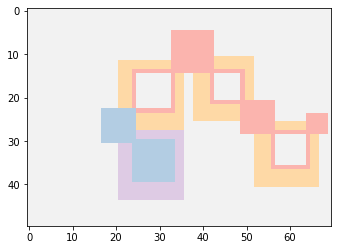

In [76]:
######### DEFINE ST_G
#  Define the starting point to place first element (st_g):
odd_even = starting_pos % 2
if odd_even == 0:
    st_g = initial_pos[starting_pos]
    IDs = ID_corners
    # print("IDs chosen: CORNERS. of len:", len(IDs))
else:
    index = int((len(initial_pos[starting_pos])/2))
    st_g = initial_pos[starting_pos][index]
    IDs = ID_edges
    # print("IDs chosen: EDGES. of len:", len(IDs))

# print("Initial index for configuration:", st_g)
IDs_sucess = []
worlds = []
success_step = 0
### CONFIGURING GENERATION ###
for t in range(0, int(len(IDs))): # BIG LOOP over IDs
    ID_i = str(IDs[t])
    k = t #to print good prompt
    # print("   ID", (t+1) ,":", ID_i)
    
    ######### Clean array between tries
    array[:,:] = max_dist
    # Reserve first row and column: Limitation of the script Hidden Corridor:
    array[0] = max_dist - 2
    array[:,0] = max_dist - 2

    ######### PLACEMENT 1: "Fixed"
    # print("STEP", 0)
    givenvalue = Big_steps[0][0]
    st = st_g
    # print("st for step 0", st)
    sp = Shape(givenvalue)   #select it shape in the repository, could change with TIM SCRIPT!
    # print("sp for step 0", sp)

    Direction = 0
    operator = Direction_to_operator(starting_pos, Direction) #Give operator based on direction
    Apply_corner_w_Ope(operator)

    ######### PLACEMENT i+1
    st_HC = []
    step = 0
    nghs_of_courts = []
    for i in range(0, len(str(IDs[0]))):
        # print("STEP", i+1)
        givenvalue = Big_steps[i][0]
        # print("value for previous step:", givenvalue)
        #Retrieve possible st from previous step
        st_temp = corners_of_shape(world, givenvalue)
        # print("possible st from previous step:", st_temp)

        #Retrieve direction at that step
        Direction = int(ID_i[i])
        operator = Direction_to_operator(starting_pos, Direction) #Get operator for the step

        #Recompute the element value of this step
        st = st_temp[operator]
        # print("st for this step:", st)
        st_HC.append(st)
        givenvalue = Big_steps[i+1][0]
        # print("value of space at this step:", givenvalue)
        sp = Shape(givenvalue)
        # print("before detection: st & sp = ", st, sp)
        #Test for detect
        detect = Detect_Bound_w_ope(world, st, sp, operator)
        # print("result detection:", detect)
        if detect == False:
            # print("couldnt proceed with this ID")
            break #will try the next ID   


        type_of_space = Repository[givenvalue][2]
        # print(type_of_space)
        if type_of_space == 0:

            Apply_corner_w_Ope(operator) # Apply general space
            #Append ngh of the space before placing garden
            nhgs_of_court = Direct_neighbors_of_shape(world, givenvalue)
            nghs_of_courts.append(nhgs_of_court)
            #Preparing garden
            st = garden_st(st, operator)
            sp = garden_space(sp)
            givenvalue = max_dist - 1 #value of green space
            Apply_corner_w_Ope(operator) #Apply with new conditions
        else:
            #Apply
            Apply_corner_w_Ope(operator)
        step = step + 1
    
    #check if this ID was suceesful, test to place the courtyard
    court_bool = False #To break out if courtyard doesn't succeed
    ################# BEGINNING COURTYARD POPULATION
    if step == len(str(IDs[0])): # COURTYARD PLACEMENT if
        courtyard_value = []
        for i in range(1, int(len(Big_steps)), 2):
            courtyard_value.append(Big_steps[i][0])
        courtyard_index = [] #for edges occupied per courtyards
        for f in range(0, int(len(courtyard_value))):
            temp = courtyard_value[f]
            corner_court = corners_of_shape(world, temp)
            courtyard_index.append(corner_court)

        # edges occupied for each couryard
        temp_e = []
        for n in range(0, int(len(courtyard_index)*4)):
            temp_e.append(0)
        Ocupied_corners_pg = []
        two_split = np.array_split(temp_e, int((len(courtyard_index)*4)/4))

        for edge in two_split:
            Ocupied_corners_pg.append(list(edge))
        for n in range(0, int(len(courtyard_index))):
            for t in range(0, int(len(courtyard_index[n]))):
                for w in range(0, int(len(st_HC))):
                    if courtyard_index[n][t] == st_HC[w]:
                        Ocupied_corners_pg[n][t] = 1
                        continue

        ### St and Sp around courtyard
        ### Run again with the real ocupied corners (post generation)
        court_dict = []
        for n in range(0, len(courtyard_1F)):
            court_dict.append([])
            court_dict[n] = create_queues(courtyard_1F[n], courtyard_1F_C[n], slot_widths[n], courtyard_matrix[n], Ocupied_corners_pg[n])
        # print(court_dict[2])

        st_slots_key = []
        Length_slots = []
        width_slots = []
        for n in range(0, len(courtyard_1F)):
            st_slots_key.append(court_dict[n]["slots_starting"])
            # Length_slots.append(sort_with_key(court_dict[n]["slots_prio"], court_dict[n]["slots_order"]))
            # width_slots.append(sort_with_key(court_dict[n]["slots_prio_keys"], court_dict[n]["slots_order"]))
            Length_slots.append(court_dict[n]["slots_prio"])
            width_slots.append(court_dict[n]["slots_prio_keys"])

        # create matrix shape of the slots (reverse sp on odd slots)
        Length_slots = Flatten(Length_slots)
        width_slots = Flatten(width_slots)
        sp_slots = []
        for n in range(0, int(len(Length_slots))):
            if n % 2 == 0:
                sp_slots.append((Length_slots[n], width_slots[n]))
            else:
                sp_slots.append((width_slots[n], Length_slots[n]))

        #Re-create structure of data
        Final_sp_slot = []
        for n in range(0, int(len(st_slots_key))):
            temp_slot = []
            for w in range(0, int(len(st_slots_key[0]))):
                temp_slot.append(sp_slots.pop(0))
            Final_sp_slot.append(temp_slot)

        court_to_pop = []
        for n in range(1, int(len(Big_steps)), 2):
            court_to_pop.append(Big_steps[n])
        court_to_pop = Flatten(court_to_pop)
        # print(court_to_pop)

        #Append index of ngh of last courtyard (did not pass:  != open space)
        paint_array(world, courtyard_index[3], court_to_pop[3])
        nghs_of_courts_Final = nghs_of_courts.copy()
        nghs_of_courts_Final.append(Direct_neighbors_of_shape(world, court_to_pop[3]))

        #Set up st point at first cell of each edge of the courtyards
        st_slots = []
        for w in nghs_of_courts_Final:
            # print("     neighs of shape at step: ")
            # print("neighs of shape at step: ", w)
            st_slot_temp = []
            for p in w:
                # print("Edge of that step:", p)
                st_slot_temp.append(p[0])
            st_slots.append(st_slot_temp)

        # move starting points acording to the moving key
        moved_st_slot = []
        for o in range(0, int(len(st_slots))):
            slots_temp = []
            for p in range(0, int(len(st_slots[0]))):
                # print("key:", key,"x:", temp_x,"y:", temp_y)
                key = st_slots_key[o][p]
                temp_x = st_slots[o][p][0]
                temp_y = st_slots[o][p][1]
                if p == 0:
                    temp_x = temp_x - key
                elif p == 1:
                    temp_y = temp_y - key
                elif p == 2:
                    temp_x = temp_x + key
                elif p == 3:
                    temp_y = temp_y + key
                slots_temp.append((temp_x, temp_y)) 
            moved_st_slot.append(slots_temp)

        #apply them with operator based on their side
        for o in range(0, int(len(st_slots))):
            for p in range(0, int(len(st_slots[0]))):
                operator = (p+1)%4
                st = moved_st_slot[o][p]
                # print(st)
                sp = Final_sp_slot[o][p]
                # print(sp)
                givenvalue = court_to_pop[o] + int((p+1)%4 + 20)
                # print(givenvalue)
                ######## DETECT WITH OPERATOR #########
                detect = Detect_Bound_w_ope(world, st, sp, operator)
                # print("result detection:", detect)
            
                if detect == False:

                    ########################### PRINT ARRAY TO SEE RESULT Failed
                    # # Save the image of the array printed
                    # #Save valid world before invalid step
                    # index_image = str(ID_i)     #link to loop
                    # plt.imshow(world, interpolation="nearest")
                    # name = "_CY_fixed_world_ID" + str((k+1)) + "_"
                    # url = folder + name + index_image +'.png'
                    # plt.savefig(url, dpi=100)

                    Apply_corner_w_Ope(operator)

                    # apply moved_st_slot to see result
                    test_print = cull_out_OB_flat(world, Flatten(moved_st_slot))
                    paint_array(world, test_print, 75)
                    # save invalid step
                    # index_image = str(ID_i)     #link to loop
                    # plt.imshow(world, interpolation="nearest")
                    # name = "_CY_fixed_Courtyard_ID" + str((k+1)) + "_"
                    # url = folder + name + index_image +'.png'
                    # plt.savefig(url, dpi=100)
                    ########################### DEBUG PRINT ARRAY TO SEE RESULT
                    court_bool = True #if, True will try the next ID

                    print("ID", (k+1), "/",len(IDs), ":", ID_i, "   -   -    Worked")
                    print("Courtyard clash with something...")
                    break   #will try the next ID 
                #Apply if detect is true
                Apply_corner_w_Ope(operator)
            if court_bool == True:
                break
        if court_bool == True:
            # print("it exited, when court_bool was False")
            continue
    
    #implement here the courtyard placement, and run detection on it
    ################# END OF COURTYARD POPULATION

    #check if this ID was suceesful
    # it was already, if it reaches that point, it will work
    if step == len(str(IDs[0])):
        success_step = success_step + 1
        index_good_ID = t+1
        Value_good_ID = ID_i

        #To retrieve the ID_i wanted after choosing all the options
        if int(ID_i) == 3222330:
            print("the specific ID", ID_i, "is chosen, ID", (k+1), "/",len(IDs))
            break

        print("SUCCESFULL ID", (k+1), "/",len(IDs), ":", ID_i)
        # break #Comment if you want to record all the valid IDs

        # Print image and save array all valid IDs
        ### images
        index_image = str(ID_i)     #link to loop
        plt.imshow(world, interpolation="nearest", cmap="Pastel1")
        
        # name to create gif
        name = "_ID_" + str(ID_i) + "_Entrance" + str(starting_pos) + "_" + str(success_step)
        url = folder + name + '.png'

        # #Name to keep track of initial conditions
        # name = "_Array" + str(x_array) + "x" + str(y_array) + "_start" + str(starting_pos) + "_ID_" 
        # url = folder + name + index_image + '.png'

        # plt.savefig(url, dpi=300)

        #### save array at it ID
        IDs_sucess.append(int(ID_i))
        worlds.append(world.copy())

        
        

if step != len(str(IDs[0])):
    print("Didn't compute: Enlarge the plot or reduce comunity rooms")
else:
    # repaint first cloumn and row
    array[0] = max_dist
    array[:,0] = max_dist
    paint_cor = []
    courtyard_value = []
    for i in range(1, int(len(Big_steps)), 2):
        courtyard_value.append(Big_steps[i][0])
    courtyard_index = [] #for edges occupied per courtyards
    for n in range(0, int(len(courtyard_value))):
        temp = courtyard_value[n]
        indexes_temp = index_of(world, temp)
        corner_court = corners_of_shape(world, temp)
        courtyard_index.append(corner_court)
        # paint courtyard into corridor value == 0
        if Repository[temp][2] == 0:
            # print("space containing", temp, "is painted in 0")
            paint_array(world, indexes_temp, 0)
    # print("INDEX OF EACH COURTYARD == 0:", courtyard_index)
    print("Generation completed")
    im = plt.imshow(world, cmap="Pastel1")  #(MATPLOTLIB)
    plt.show()
    
    # paint_array(world, st_HC, 0)
    # print("index for hidden corridors, big spaces:", st_HC)

### Courtyard population

In [77]:
# # MANUAL 

# ##### COURTYARD POPULATION
# # edges occupied for each couryard
# temp_e = []
# for n in range(0, int(len(courtyard_index)*4)):
#     temp_e.append(0)
# Ocupied_corners_pg = []
# two_split = np.array_split(temp_e, int((len(courtyard_index)*4)/4))

# for edge in two_split:
#     Ocupied_corners_pg.append(list(edge))
# for n in range(0, int(len(courtyard_index))):
#     for t in range(0, int(len(courtyard_index[n]))):
#         for w in range(0, int(len(st_HC))):
#             if courtyard_index[n][t] == st_HC[w]:
#                 Ocupied_corners_pg[n][t] = 1
#                 continue

# # Variable to pop courtyard
# # print("pop courtyard:", pop_courtyard)



# ### St and Sp around courtyard
# ### Run again with ocupied corners post generation
# court_dict = []
# for n in range(0, len(courtyard_1F)):
#     court_dict.append([])
#     court_dict[n] = create_queues(courtyard_1F[n], courtyard_1F_C[n], slot_widths[n], courtyard_matrix[n], Ocupied_corners_pg[n])
# # print(court_dict[2])

# st_slots_key = []
# Length_slots = []
# width_slots = []
# for n in range(0, len(courtyard_1F)):
#     st_slots_key.append(court_dict[n]["slots_starting"])
#     # # When Def sorts
#     # Length_slots.append(sort_with_key(court_dict[n]["slots_prio"], court_dict[n]["slots_order"]))
#     # width_slots.append(sort_with_key(court_dict[n]["slots_prio_keys"], court_dict[n]["slots_order"]))

#     # When Def doesnt sorts
#     Length_slots.append(court_dict[n]["slots_prio"])
#     width_slots.append(court_dict[n]["slots_prio_keys"])


# # print("starting point slots keys:", st_slots_key)
# print("length slots:", Length_slots)
# print("Width Slots: ", width_slots)
# # print("Slot order: ", slot_order)
# # print(court_dict[0])

# # create matrix shape of the slots (reverse sp on odd slots)
# Length_slots = Flatten(Length_slots)
# width_slots = Flatten(width_slots)
# sp_slots = []
# for n in range(0, int(len(Length_slots))):
#     if n % 2 == 0:
#         sp_slots.append((Length_slots[n], width_slots[n]))
#     else:
#         sp_slots.append((width_slots[n], Length_slots[n]))

# #Re-create structure of data
# Final_sp_slot = []
# for n in range(0, int(len(st_slots_key))):
#     temp_slot = []
#     for w in range(0, int(len(st_slots_key[0]))):
#         temp_slot.append(sp_slots.pop(0))
#     Final_sp_slot.append(temp_slot)

# court_to_pop = []
# for n in range(1, int(len(Big_steps)), 2):
#     court_to_pop.append(Big_steps[n])
# court_to_pop = Flatten(court_to_pop)
# # print(court_to_pop)

# #Append index of ngh of last courtyard (did not pass:  != open space)
# paint_array(world, courtyard_index[3], court_to_pop[3])
# nghs_of_courts_Final = nghs_of_courts.copy()
# nghs_of_courts_Final.append(Direct_neighbors_of_shape(world, court_to_pop[3]))

# #Set up st point at first cell of each edge of the courtyards
# st_slots = []
# for w in nghs_of_courts_Final:
#     # print("     neighs of shape at step: ")
#     # print("neighs of shape at step: ", w)
#     st_slot_temp = []
#     for p in w:
#         # print("Edge of that step:", p)
#         st_slot_temp.append(p[0])
#     st_slots.append(st_slot_temp)

# # move starting points acording to the moving key
# moved_st_slot = []
# for o in range(0, int(len(st_slots))):
#     slots_temp = []
#     for p in range(0, int(len(st_slots[0]))):
#         # print("key:", key,"x:", temp_x,"y:", temp_y)
#         key = st_slots_key[o][p]
#         temp_x = st_slots[o][p][0]
#         temp_y = st_slots[o][p][1]
#         if p == 0:
#             temp_x = temp_x - key
#         elif p == 1:
#             temp_y = temp_y - key
#         elif p == 2:
#             temp_x = temp_x + key
#         elif p == 3:
#             temp_y = temp_y + key
#         slots_temp.append((temp_x, temp_y)) 
#     moved_st_slot.append(slots_temp)

# #apply them with operator based on their side
# for o in range(0, int(len(st_slots))):
#     for p in range(0, int(len(st_slots[0]))):
#         operator = (p+1)%4
#         st = moved_st_slot[o][p]
#         # print(st)
#         sp = Final_sp_slot[o][p]
#         # print(sp)
#         givenvalue = court_to_pop[o]+int(1.5*(1+o+p))
#         # print(givenvalue)
#         ######## DETECT WITH OPERATOR #########
#         # Apply_corner_w_Ope(operator) #comment this one, to disable script


# print("Ocupied Corners post generation", Ocupied_corners_pg)
# print("key_slots:", st_slots_key)
# print("size Courtyards:", Shape(court_to_pop[0]), Shape(court_to_pop[1]),Shape(court_to_pop[2]),Shape(court_to_pop[3]))
# print("Values of space to print", court_to_pop)
# print(" moved st slots:", moved_st_slot)
# print("Slots Matrix space:", Final_sp_slot)
# # print("st slots:", st_slots)

In [78]:
# test_print = Flatten(st_slots)
# paint_array(world, test_print, 10)

# test_print = Flatten(moved_st_slot)
# paint_array(world, test_print, 200)

## Visualisation

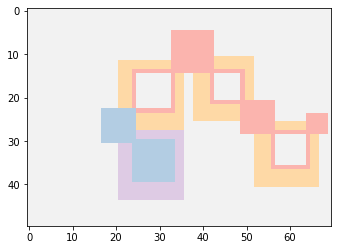

In [79]:
# display(pd.DataFrame(world))
im = plt.imshow(world, cmap="Pastel1")  #(MATPLOTLIB)
plt.show()

# save the image
################### increase quality
# plt.imsave('test.png', world)

# increase quality of image
# fig.savefig('filename.extension', dpi=300)

# # # save image, matplotlib
# plt.imsave('test.png', Map)
# # plt.imsave('test.png', Map, cmap=cmap)

In [80]:
# # save image, matplotlib (high quality)
# index_image = 1 #link to loop
# plt.imshow(world, interpolation="nearest")
# name = "- test "
# url = folder + name + str(index_image) +'.png'
# plt.savefig(url, dpi=600)

## Choose World to continue with

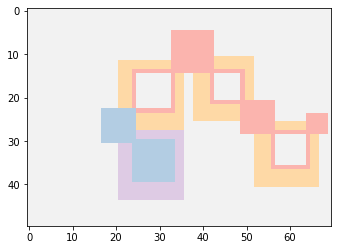

In [81]:
## Check images to chose the suited one..

# print(IDs_sucess)
# out of the list: Input ID to continue with,
# ID_selected = 3222330
# index = IDs_sucess.index(ID_selected)
# print(index, ": ID - ", IDs_sucess[index])

im = plt.imshow(world, cmap="Pastel1")  #(MATPLOTLIB)
plt.show(im)

# copy the selected_ID in line 261 of Generation

# STEP 3: Hidden corridors, adjacencies & wall exports

## STEP 2.1 - Hidden corridors

In [82]:
paint_array(world, st_HC, 0)
print("index for hidden corridors, big spaces:", st_HC)

#Matrix with the hidden corridors
world_HC = np.copy(world)

index for hidden corridors, big spaces: [(28, 64), (28, 56), (21, 49), (14, 42), (14, 33), (23, 24), (30, 24)]


### HC between big spaces

In [83]:
# print(HC_big)
HC_big = st_HC
paint_array(world_HC, HC_big, max_dist+1)

### HC for adjacents to courtyard

In [84]:
pos = index_of(world, 0) #index of cells == 0

# Take out the hidden corridors already found
pos = list(set(pos).difference(set(HC_big)))
pos_ngh = []
for i in range(0, int(len(pos))):
    pos_temp = pos[i]
    pos_ngh.append(call_neighbor_of(world, pos_temp))
    
val_pos = 0
# print(pos)
for u in range(0, int(len(pos_ngh))):
    cell_ngh = pos_ngh[u]
    # print(cell_ngh)
    for i in range(0, len(cell_ngh)): #inside the neighbors of the cell x of the corridor
        pos_2 = cell_ngh[i]
        # print(pos_2)
        val_pos_2 = world[cell_ngh[i]]
        # print(val_pos_2)
        pos_ngh_2 = call_neighbor_of(world, pos_2)
        # print(pos_ngh_2)
        val_ngh_2 = []
        for t in range(0, len(pos_ngh_2)): # inside the each neighbors of the cell x
            val_ngh_2.append(world[pos_ngh_2[t]])
            # print(t)
            # print(val_ngh_2)
        # print("Pos, value pos:", pos_2, val_pos_2, ": value of the ngh", val_ngh_2) #value of neighbors of the neighbor at step i

        if val_pos_2 == 0:
            # print("     this pos is already a corridor")
            continue
        else:
            for t in range(0, len(pos_ngh_2)):
                a = val_ngh_2[t%4]
                b = val_ngh_2[(t+1)%4]
                # print("     ",a, b)
                if 0 == a and val_pos_2 != b and b != int(max_dist-1) and b != 0:
                    # print("true")
                    # print(pos_2, "with value", world[pos_2] ,"is a hidden corridor, with a,b=",a , ",",b)
                    paint_single(world_HC, pos_2, max_dist+1)
                else:
                    # print("false")
                    continue

### HC visualisation

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
1,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
2,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
3,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
4,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
5,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
6,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
7,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
8,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
9,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120


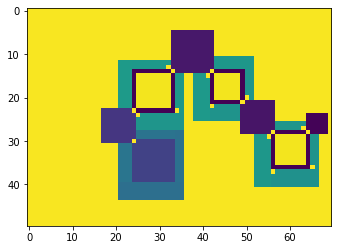

In [85]:
display(pd.DataFrame(world_HC))
ima = plt.imshow(world_HC)  #(MATPLOTLIB)
plt.show()

## STEP 2.2 - Adjacencies

### Initialisation

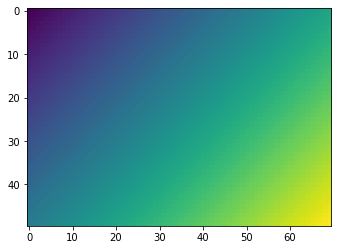

In [86]:
#Create gradient array for steps
world_grad = Initialise_Array(x_array, y_array)
world_grad[0, 0] = 0
world_grad = Distance_map(world_grad)

# Export 2D array as csv file
gradient = pd.DataFrame(world_grad)
gradient.to_csv(r'C:\Users\Thomas Lindemann\OneDrive - Delft University of Technology\Earthy\03_Shaping\Process study\placing_walls_csv_files\gradient.csv', index = False, header=False)

#### Top left logic of analysing
# display(pd.DataFrame(world_grad))
img = plt.imshow(world_grad)  #(MATPLOTLIB)
plt.show()

### Right side placement

In [87]:
world_rigth_w = Initialise_Array(x_array, y_array)

In [109]:
nbr_steps = world_grad.max()
# for i in range(0, 19):
for i in range(0, nbr_steps+1):
    step = i
    # print("STEP", i)
    pos_step = index_of(world_grad, i)
    # print("position at that step", pos_step)
    val_step = []
    for t in range(0, int(len(pos_step))):
        val_step.append(world_HC[pos_step[t]]) #Read value of step on world_HC 
    # print("value of step", val_step)

    pos_rigth_ngh = []
    for t in range(0, int(len(pos_step))):
        pos_ngh_temp = pos_step[t]
        pos_ngh_temp = call_neighbor_of(world_grad, pos_ngh_temp)
        pos_ngh_temp = pos_ngh_temp[0] #select right side
        # ngh_temp = ngh_temp[3] #select bottom side
        pos_rigth_ngh.append(pos_ngh_temp)
        #clean the out of bound index
        bad_right_ngh = rtv_Bad_index(world, pos_rigth_ngh)
        pos_rigth_ngh = cull_out_OB_flat(world, pos_rigth_ngh)
        # print("bad index at the step:", bad_right_ngh)
    # print("pos righ ngh", pos_rigth_ngh)

    val_righ_ngh = []
    for t in range(0, int(len(pos_rigth_ngh))):
        pos_temp = pos_rigth_ngh[t]
        val_ngh_temp = world_HC[pos_temp] #Read value of right ngh on world_HC
        val_righ_ngh.append(val_ngh_temp)

    #for last step: when nothing is to be found
    if i == nbr_steps:
        # world_rigth_w[:,world.shape[1]-1] = 0
        # paint_single(world_rigth_w, pos_step[t], 150)
        if val_step[-1] == 46:
            # print("EMPTY")
            paint_single(world_rigth_w, pos_step[t], 0)
        else:
            paint_single(world_rigth_w, pos_step[t], 3)
            # print("WINDOW at", pos_step[0], pos_step[t])

    # After a certain step, the ngh is out of bound
    # In order to have the same length in both compared list,
    # we have to take out the item that was out of bound
    if i >= int(world.shape[1]-1): #to be changed to for the bottom version !!!!
        if val_step[0] == max_dist:
            # print("EMPTY")
            paint_single(world_rigth_w, pos_step[0], 0)
        else:
            # print("WINDOW at", pos_step[0])
            paint_single(world_rigth_w, pos_step[0], 3)
        pos_step.pop(0)
        val_step.pop(0)
    
    # print("pos_step len(",len(pos_step),")",
    # "val_step len(",len(val_step),")",
    # "pos_rigth_ngh len(",len(pos_rigth_ngh),")",
    # "val_righ_ngh len(",len(val_righ_ngh),")",)
    

    for t in range(0, int(len(val_righ_ngh))):
        a = val_step[t]
        a_world = world[pos_step[t]]
        b = val_righ_ngh[t]
        b_world = world[pos_rigth_ngh[t]]
        # print(a, b, ", in world", a_world, b_world)

        # Value used in if statement
        out = max_dist
        gard = max_dist-1
        hid_c = max_dist+1
        cor = 0


        if a==b and a_world==b_world:
            # print("OPEN")
            wall_type = 0
        elif ((a==hid_c and b==cor) or (b==hid_c and a==cor)) and a_world==b_world:
            wall_type = 0
        elif ((a== hid_c and b!=cor) or (b==hid_c and a!=cor)) and a_world==b_world:
            wall_type = 0
        elif (b == gard and a == cor) or (a == gard and b == cor): 
            # print("RIWAQ")
            wall_type = 1
        elif (b == hid_c and a == cor) or (a == hid_c and b == cor):
            # print("DOOR")
            wall_type = 2
        elif ((a==hid_c and (b!=cor and b!=hid_c)) or (b==hid_c and (a!=cor and a!=hid_c))) and (a_world==cor or b_world==cor):
            # print("DOOR")
            wall_type = 2
        elif a == out or b == out or a == cor or b == cor:
            # print("WINDOW")
            wall_type = 3
        else:
            # print("WALL")
            wall_type = 4
        
        paint_single(world_rigth_w, pos_step[t], wall_type)

# Export 2D array as csv file
right_walls = pd.DataFrame(world_rigth_w)
right_walls.to_csv(r'C:\Users\Thomas Lindemann\OneDrive - Delft University of Technology\Earthy\03_Shaping\Process study\placing_walls_csv_files\walls_right_side.csv', index = False, header=False)

### Visualisation right wall matrix

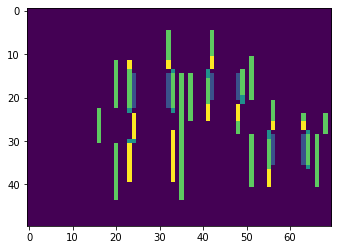

In [89]:
# display(pd.DataFrame(world_rigth_w))
img = plt.imshow(world_rigth_w)  #(MATPLOTLIB)
plt.show()

### Bottom side placement

In [90]:
world_rigth_b = Initialise_Array(x_array, y_array)

In [91]:
nbr_steps = world_grad.max()
# for i in range(0, 19):
for i in range(0, nbr_steps+1):
    step = i
    # print("STEP", i)
    pos_step = index_of(world_grad, i)
    # print("position at that step", pos_step)
    val_step = []
    for t in range(0, int(len(pos_step))):
        val_step.append(world_HC[pos_step[t]]) #Read value of step on world_HC 
    # print("value of step", val_step)

    pos_rigth_ngh = []
    for t in range(0, int(len(pos_step))):
        pos_ngh_temp = pos_step[t]
        pos_ngh_temp = call_neighbor_of(world_grad, pos_ngh_temp)
        pos_ngh_temp = pos_ngh_temp[3] #select bottom side
        pos_rigth_ngh.append(pos_ngh_temp)
        #clean the out of bound index
        bad_right_ngh = rtv_Bad_index(world, pos_rigth_ngh)
        pos_rigth_ngh = cull_out_OB_flat(world, pos_rigth_ngh)
        # print("bad index at the step:", bad_right_ngh)
    # print("pos righ ngh", pos_rigth_ngh)

    val_righ_ngh = []
    for t in range(0, int(len(pos_rigth_ngh))):
        pos_temp = pos_rigth_ngh[t]
        val_ngh_temp = world_HC[pos_temp] #Read value of right ngh on world_HC
        val_righ_ngh.append(val_ngh_temp)

    #for last step: when nothing is to be found
    if i == nbr_steps:
        # world_rigth_b[world.shape[0]-1] = 0 #empty
        # paint_single(world_rigth_b, pos_step[t], 150)
        if val_step[-1] == 46:
            # print("EMPTY")
            paint_single(world_rigth_b, pos_step[t], 0)
        else:
            paint_single(world_rigth_b, pos_step[t], 3)
            # print("WINDOW")

    # After a certain step, the ngh is out of bound
    # In order to have the same length in both compared list,
    # we have to take out the item that was out of bound
    if i >= int(world.shape[0]-1): #to be changed to for the bottom version !!!!
        if val_step[-1] == max_dist:
            # print("EMPTY")
            paint_single(world_rigth_b, pos_step[-1], 0)
        else:
            paint_single(world_rigth_b, pos_step[-1], 3)
            # print("WINDOW", pos_step[-1], pos_step[t])
        pos_step.pop()
        val_step.pop()
    
    # print("pos_step len(",len(pos_step),")",
    # "val_step len(",len(val_step),")",
    # "pos_rigth_ngh len(",len(pos_rigth_ngh),")",
    # "val_righ_ngh len(",len(val_righ_ngh),")",)
    

    for t in range(0, int(len(val_righ_ngh))):
        a = val_step[t]
        a_world = world[pos_step[t]]
        b = val_righ_ngh[t]
        b_world = world[pos_rigth_ngh[t]]
        # print(a, b, ", in world", a_world, b_world)

        # Value used in if statement
        out = max_dist
        gard = max_dist-1
        hid_c = max_dist+1
        cor = 0

        if a==b and a_world==b_world:
            # print("OPEN")
            wall_type = 0
        elif ((a==hid_c and b==cor) or (b==hid_c and a==cor)) and a_world==b_world:
            wall_type = 0
        elif ((a== hid_c and b!=cor) or (b==hid_c and a!=cor)) and a_world==b_world:
            wall_type = 0
        elif (b == gard and a == cor) or (a == gard and b == cor): 
            # print("RIWAQ")
            wall_type = 1
        elif (b == hid_c and a == cor) or (a == hid_c and b == cor):
            # print("DOOR")
            wall_type = 2
        elif ((a==hid_c and (b!=cor and b!=hid_c)) or (b==hid_c and (a!=cor and a!=hid_c))) and (a_world==cor or b_world==cor):
            wall_type = 2
        elif a == out or b == out or a == cor or b == cor:
            # print("WINDOW")
            wall_type = 3
        else:
            # print("WALL")
            wall_type = 4
        
        paint_single(world_rigth_b, pos_step[t], wall_type)

# Export array as csv file
bottom_walls = pd.DataFrame(world_rigth_b)
bottom_walls.to_csv(r'C:\Users\Thomas Lindemann\OneDrive - Delft University of Technology\Earthy\03_Shaping\Process study\placing_walls_csv_files\walls_bottom_side.csv', index = False, header=False)

### Visualisation Bottom wall matrix

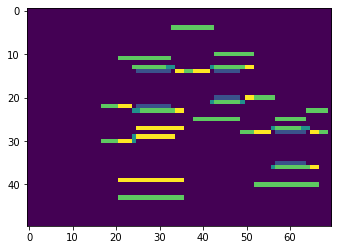

In [92]:
# display(pd.DataFrame(world_rigth_b))
img = plt.imshow(world_rigth_b)  #(MATPLOTLIB)
plt.show()

end of script :)

Go to grashopper script now...

# STEP 4 : Nolly Plan & Garden generator

In [103]:
world_garden = Initialise_Array(x_array, y_array)
# Create Nolly plan
emptyness = index_of(world, max_dist)
paint_array(world_garden, emptyness, 1)
build = index_of(world_garden, max_dist)
paint_array(world_garden, build, 0)
paint_array(world_garden, emptyness, max_dist)

#Gradient map around build area
world_garden = Distance_map(world_garden)

# Export 2D array as csv file
garden_gradient = pd.DataFrame(world_garden)
garden_gradient.to_csv(r'C:\Users\Thomas Lindemann\OneDrive - Delft University of Technology\Earthy\03_Shaping\Process study\placing_walls_csv_files\garden_gradient.csv', index = False, header=False)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,33,32,31,30,29,28,27,26,25,24,...,20,21,22,23,24,24,24,24,24,25
1,32,31,30,29,28,27,26,25,24,23,...,19,20,21,22,23,23,23,23,23,24
2,31,30,29,28,27,26,25,24,23,22,...,18,19,20,21,22,22,22,22,22,23
3,30,29,28,27,26,25,24,23,22,21,...,17,18,19,20,21,21,21,21,21,22
4,29,28,27,26,25,24,23,22,21,20,...,16,17,18,19,20,20,20,20,20,21
5,28,27,26,25,24,23,22,21,20,19,...,15,16,17,18,19,19,19,19,19,20
6,27,26,25,24,23,22,21,20,19,18,...,14,15,16,17,18,18,18,18,18,19
7,26,25,24,23,22,21,20,19,18,17,...,13,14,15,16,17,17,17,17,17,18
8,25,24,23,22,21,20,19,18,17,16,...,12,13,14,15,16,16,16,16,16,17
9,24,23,22,21,20,19,18,17,16,15,...,11,12,13,14,15,15,15,15,15,16


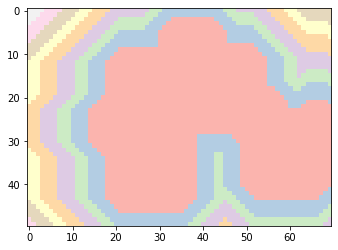

In [104]:
display(pd.DataFrame(world_garden))
im_gar = plt.imshow(world_garden, cmap="Pastel1")  #(MATPLOTLIB)
plt.show()

# RESULT PROMPT

In [95]:
print("SUCCESFULL ID", index_good_ID, ":", Value_good_ID)

SUCCESFULL ID 4 : 3222330


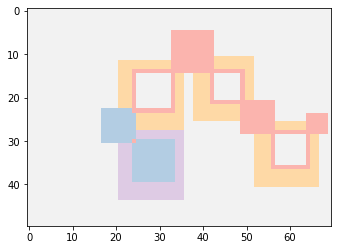

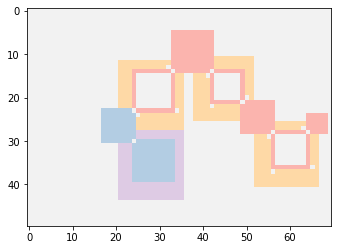

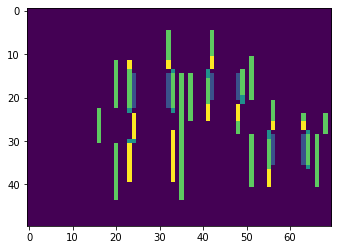

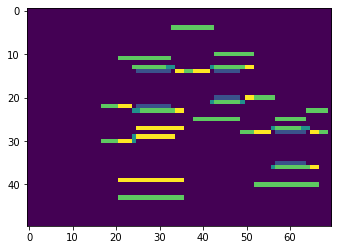

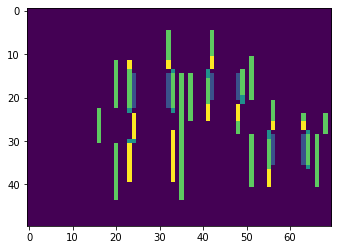

In [97]:
# display(pd.DataFrame(world))
im = plt.imshow(world, cmap="Pastel1")  #(MATPLOTLIB)
plt.show()
ima = plt.imshow(world_HC, cmap="Pastel1")  #(MATPLOTLIB)
plt.show()
img = plt.imshow(world_rigth_w)  #(MATPLOTLIB)
plt.show()
img = plt.imshow(world_rigth_b)  #(MATPLOTLIB)
plt.show()


# plt.imshow(world_HC, interpolation="nearest", cmap="Pastel1")
plt.imshow(world_rigth_w, interpolation="nearest")
name = "_world_rigth_w"
url = folder + name + '.png'
plt.savefig(url, dpi=450)